In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
!pwd
!ls

/home/frekle/github/opensimrt/catkin_devel/tmp/refdata/refdata/normative-gait
normative-dataset-comparison.xlsx  Untitled.ipynb


In [18]:
a = pd.read_excel(io="normative-dataset-comparison.xlsx",sheet_name=u"Joint Rotations",  header=[0,1], 
                   index_col=[0,1], )

In [19]:
a.head()


% Gait Cycle        Centre one           Centre two            Your data  \
                       Average        SD    Average        SD    Average   
Pelvis Ant/Pst 0.00  12.629482  5.253442  12.405484  5.239415  12.517483   
               0.02  12.468211  5.214059  12.198548  5.228519  12.333380   
               0.04  12.251852  5.173112  11.970645  5.210706  12.111249   
               0.06  11.909685  5.133795  11.729677  5.218934  11.819681   
               0.08  11.504542  5.094359  11.525000  5.233096  11.514771   

% Gait Cycle                   
                           SD  
Pelvis Ant/Pst 0.00  5.246428  
               0.02  5.221289  
               0.04  5.191909  
               0.06  5.176364  
               0.08  5.163727

In [22]:
a.index

MultiIndex([('Pelvis Ant/Pst',  0.0),
            ('Pelvis Ant/Pst', 0.02),
            ('Pelvis Ant/Pst', 0.04),
            ('Pelvis Ant/Pst', 0.06),
            ('Pelvis Ant/Pst', 0.08),
            ('Pelvis Ant/Pst',  0.1),
            ('Pelvis Ant/Pst', 0.12),
            ('Pelvis Ant/Pst', 0.14),
            ('Pelvis Ant/Pst', 0.16),
            ('Pelvis Ant/Pst', 0.18),
            ...
            (  'Foot Int/Ext', 0.82),
            (  'Foot Int/Ext', 0.84),
            (  'Foot Int/Ext', 0.86),
            (  'Foot Int/Ext', 0.88),
            (  'Foot Int/Ext',  0.9),
            (  'Foot Int/Ext', 0.92),
            (  'Foot Int/Ext', 0.94),
            (  'Foot Int/Ext', 0.96),
            (  'Foot Int/Ext', 0.98),
            (  'Foot Int/Ext',  1.0)],
           length=459)

In [23]:
# goal

In [53]:
def load_reference_ik_data():
    return pd.read_csv("../IK_REFERENCES_PAPER.csv", header=1)

In [121]:
a_goal = pd.read_csv("../IK_REFERENCES_PAPER.csv", header=1)
a_goal.head()

,'Gait_percentage','Pelvis_Ant_Pst_C1','Pelvis_Ant_Pst_C1SD','Pelvis_Ant_Pst_C2','Pelvis_Ant_Pst_C2SD','Pelvic_Up_Dn_C1','Pelvic_Up_Dn_C1SD','Pelvic_Up_Dn_C2','Pelvic_Up_Dn_C2SD','Pelvic_Int_Ext_C1',...,'Knee_Flx_Ext_C2','Knee_Flx_Ext_C2SD','Ankle_Dor_Pla_C1','Ankle_Dor_Pla_C1SD','Ankle_Dor_Pla_C2','Ankle_Dor_Pla_C2SD','Foot_Int_Ext_C1','Foot_Int_Ext_C1SD','Foot_Int_Ext_C2','Foot_Int_Ext_C2SD'
0,0%,12.63,5.25,12.41,5.24,0.90,2.04,1.83,2.21,4.41,...,6.79,4.48,-2.11,5.19,-2.39,4.48,-8.54,6.52,-11.77,6.37
1,2%,12.47,5.21,12.20,5.23,1.17,2.06,2.38,2.23,4.50,...,9.99,4.53,-4.04,5.06,-4.17,4.32,-7.73,6.46,-10.55,6.31
2,4%,12.25,5.17,11.97,5.21,1.59,2.08,3.02,2.24,4.32,...,13.43,4.78,-5.76,4.76,-5.02,4.04,-6.53,6.47,-9.19,6.31
3,6%,11.91,5.13,11.73,5.22,2.21,2.12,3.70,2.25,4.00,...,16.49,5.15,-5.79,4.22,-4.60,3.77,-5.46,6.49,-7.96,6.28
4,8%,11.50,5.09,11.53,5.23,2.90,2.18,4.34,2.30,3.70,...,18.73,5.57,-4.31,3.84,-3.17,3.58,-4.90,6.51,-7.05,6.24


In [125]:
a_goal["'Gait_percentage'"]

0       0%
1       2%
2       4%
3       6%
4       8%
5      10%
6      12%
7      14%
8      16%
9      18%
10     20%
11     22%
12     24%
13     26%
14     28%
15     30%
16     32%
17     34%
18     36%
19     38%
20     40%
21     42%
22     44%
23     46%
24     48%
25     50%
26     52%
27     54%
28     56%
29     58%
30     60%
31     62%
32     64%
33     66%
34     68%
35     70%
36     72%
37     74%
38     76%
39     78%
40     80%
41     82%
42     84%
43     86%
44     88%
45     90%
46     92%
47     94%
48     96%
49     98%
50    100%
Name: 'Gait_percentage', dtype: object

In [28]:
def latex_friendly_column_names(name):
    name = name.replace(" ", "_")
    name = name.replace("/","_")
    return name
    
print(latex_friendly_column_names(a.index[0][0]))



Pelvis_Ant_Pst


In [39]:
unique_movement_names = list(set(a.index.get_level_values(0)))

unique_movement_names

['Knee Flx/Ext',
 'Foot Int/Ext',
 'Pelvic Int/Ext',
 'Ankle Dor/Pla',
 'Pelvic Up/Dn',
 'Pelvis Ant/Pst',
 'Hip Flx/Ext',
 'Hip Add/Abd',
 'Hip Int/Ext']

In [40]:
latex_friendly_names = [latex_friendly_column_names(name) for name in unique_movement_names]
latex_friendly_names

['Knee_Flx_Ext',
 'Foot_Int_Ext',
 'Pelvic_Int_Ext',
 'Ankle_Dor_Pla',
 'Pelvic_Up_Dn',
 'Pelvis_Ant_Pst',
 'Hip_Flx_Ext',
 'Hip_Add_Abd',
 'Hip_Int_Ext']

In [42]:
a.columns

MultiIndex([('Centre one', 'Average'),
            ('Centre one',      'SD'),
            ('Centre two', 'Average'),
            ('Centre two',      'SD'),
            ( 'Your data', 'Average'),
            ( 'Your data',      'SD')],
           names=['% Gait Cycle', None])

In [48]:
a[('Centre one','Average')]['Pelvis Ant/Pst']

0.00    12.629482
0.02    12.468211
0.04    12.251852
0.06    11.909685
0.08    11.504542
0.10    11.171733
0.12    10.984712
0.14    10.923794
0.16    10.965339
0.18    11.108761
0.20    11.321244
0.22    11.538550
0.24    11.718284
0.26    11.845582
0.28    11.933610
0.30    12.017874
0.32    12.127544
0.34    12.274408
0.36    12.454736
0.38    12.643447
0.40    12.797784
0.42    12.888821
0.44    12.899072
0.46    12.823980
0.48    12.683604
0.50    12.518010
0.52    12.344689
0.54    12.113377
0.56    11.777845
0.58    11.391289
0.60    11.078967
0.62    10.904434
0.64    10.852655
0.66    10.896541
0.68    11.026930
0.70    11.220463
0.72    11.429405
0.74    11.608701
0.76    11.737098
0.78    11.834135
0.80    11.934388
0.82    12.060261
0.84    12.217446
0.86    12.405287
0.88    12.605725
0.90    12.776418
0.92    12.870523
0.94    12.868354
0.96    12.768975
0.98    12.600946
1.00    12.413136
Name: (Centre one, Average), dtype: float64

In [49]:
a[('Centre one','Average')]['Pelvis Ant/Pst'].values


array([12.62948217, 12.46821085, 12.25185192, 11.90968505, 11.50454239,
       11.17173283, 10.98471218, 10.92379383, 10.96533888, 11.10876142,
       11.3212442 , 11.5385502 , 11.71828401, 11.84558223, 11.93360973,
       12.01787371, 12.12754357, 12.27440796, 12.45473554, 12.64344736,
       12.79778401, 12.8888213 , 12.89907213, 12.82397995, 12.68360372,
       12.51800953, 12.34468878, 12.11337666, 11.77784462, 11.3912885 ,
       11.07896659, 10.90443434, 10.85265527, 10.8965408 , 11.02693015,
       11.22046257, 11.42940547, 11.60870118, 11.73709821, 11.83413489,
       11.93438772, 12.06026068, 12.21744584, 12.40528653, 12.60572505,
       12.77641789, 12.87052322, 12.86835436, 12.76897454, 12.60094557,
       12.41313621])

In [ ]:
c_list = ["C1","C2"]


In [52]:
class RefDataPrimitive:
    def __init__(self):
        self.name = ""
        self.x = None
        self.mean = None
        self.sd = None
    def __repr__(self):
        return f"RefDataPrimitive(): {self.name} "
    def __str__(self):
        return f"RefDataPrimitive():\n name: {self.name}\n x: {self.x}\n mean: {self.mean}\n sd: {self.sd}"

def repeat_x(x_, n_times):
    x = x_
    STARTS_AT_ZERO = False
    if STARTS_AT_ZERO:
        x_zero_increment = x_[1]-x_[0]
    else:
        x_zero_increment = 0
    for i in range(n_times-1):

        x = np.hstack((x, x_+np.max(x)+x_zero_increment))
    return x

class RefData:
    def __init__(self, action_type):
        self.action_type = action_type
        self.reference_curve_dict = {}
        self.plot_2_sd = False

    def plot(self, reference_name_name= "all"):

        if reference_name_name == "all":
            reference_name_name = []
            for reference_name, _ in self.reference_curve_dict.items():
                reference_name_name.append(reference_name)

        if isinstance(reference_name_name,list):
            for reference_name in reference_name_name:
                self.plot_reference_name(reference_name)
        if isinstance(reference_name_name,str):
            self.plot_reference_name(reference_name_name)

    def get_curve_y(self, y_in, x, xnew, num_cycles,scale, inverted=False ):
        y   = np.tile(y_in,num_cycles+4)
        #print(len(y))
        fy =  interpolate.interp1d(x,y)
        ynew = fy(xnew)
        Y = ynew*scale
        if inverted:
            return -Y
        return Y

    def get_curve_x(self, ik_id_so_i, x_offset, num_cycles,scale ):
        x   = repeat_x(ik_id_so_i.x,num_cycles+4)
        #print(x)
        #print("lenx %d"%len(x))
        xnew = np.arange(x_offset%360, 100*num_cycles+x_offset%360, 1)
        #print(xnew)
        X =(xnew-x_offset)*scale
        return X,x, xnew

    def get_reference_name_curve(self, reference_name, num_cycles=4,scale=[1,1], inverted=False):
        x_offset = 0

        X_list = []
        Y_list = []
        for ik_id_so_i in self.reference_curve_dict[reference_name]:
            print(ik_id_so_i)
            X,x, xnew = self.get_curve_x(ik_id_so_i, x_offset, num_cycles,scale[0] )
            Y = self.get_curve_y(ik_id_so_i.mean, x, xnew, num_cycles,scale[1], inverted=inverted)
            X_list.append(X)
            Y_list.append(Y)

        return X_list,Y_list

    def plot_reference_name(self, reference_name, num_cycles=4,scale=[1,1], avg_line=True, inverted = False, ax = None): 
        """
        reference_name: is the name of the reference reference_name to be plotted
        num_cycles: is an integer

        """
        #print("plotting reference!")
        if not ax:
            fig = plt.figure()
            ax = plt.gca()

        if not self.reference_curve_dict:
            print("reference curve dictionary not set!")
            return
        #plt.figure()
        #plt.title(reference_name)

        x_offset = 0
        #num_cycles = num_cycles_+4
        if reference_name in self.reference_curve_dict:
            ik_id_so_i = self.reference_curve_dict[reference_name][0]
        #for ik_id_so_i in self.reference_curve_dict[reference_name]:

            X,x, xnew = self.get_curve_x(ik_id_so_i, x_offset, num_cycles,scale[0])
            #print("leny %d"%len(ik_id_so_i.mean))
            Y = self.get_curve_y(ik_id_so_i.mean, x, xnew, num_cycles,scale[1])
            YP = self.get_curve_y(ik_id_so_i.mean+ik_id_so_i.sd, x, xnew, num_cycles,scale[1])
            YM = self.get_curve_y(ik_id_so_i.mean-ik_id_so_i.sd, x, xnew, num_cycles,scale[1])

            if inverted:
                Y = -Y
                YP = -YP
                YM = -YM

            if avg_line:
                ax.plot(X, Y, "-", label="{} mean".format(ik_id_so_i.name))
            ax.fill_between(X,YP, YM, alpha=0.1, label= "{} 1 std ".format(ik_id_so_i.name),  linewidth=1, color="gray")

            if self.plot_2_sd:

                Y2P = self.get_curve_y(ik_id_so_i.mean+2*ik_id_so_i.sd, x, xnew, num_cycles,scale[1])
                Y2M = self.get_curve_y(ik_id_so_i.mean-2*ik_id_so_i.sd, x, xnew, num_cycles,scale[1])
                if inverted:
                    Y2P = -Y2P
                    Y2M = -Y2M

                ax.fill_between(X,Y2P, Y2M, alpha=0.1, label= "{} 2 std ".format(ik_id_so_i.name),  linewidth=1, color="lightgray")
        else:
            logging.warn("I dont have the reference %s"%reference_name)




In [ ]:
class GaitIKRefData(RefData):
    def __init__(self, own_action_name="gait"):
        RefData.__init__(self,own_action_name)
        ik_names = {}
        index_name="'Gait_percentage'"
        df = load_reference_ik_data()
        df = df.set_index(index_name)
        for col in df.columns:
            col_prefix = col.rsplit("_",1)[0].replace("'","")
            #print(col_prefix)
            cols = []
            try:
                cols = ik_names[col_prefix]
                #print(cols)
            except Exception as err:
                #print(err)
                cols = []
            cols.append(col)
            ik_names.update({col_prefix:cols})

        for key, value in ik_names.items():
            #new plot with some title
            self.reference_curve_dict.update({key:[RefDataPrimitive(),RefDataPrimitive()]})
            for col in df.columns:
                if col in value:
                    ## 2 cases, it is a means or a standard deviation seq.            
                    if "C1" in col:
                        ik_index = 0
                        name = "C1"
                    else:
                        ik_index = 1
                        name = "C2"

                    if "SD" in col:
                        self.reference_curve_dict[key][ik_index].sd = df[col].values
                    else:
                        self.reference_curve_dict[key][ik_index].name = name
                        self.reference_curve_dict[key][ik_index].mean = df[col].values

                        x = []
                        #self.reference_curve_dict[key][ik_index].x = df.index.values
                        for percentage_string in df.index.values:
                            x.append(float(percentage_string.replace("%","")))
                        self.reference_curve_dict[key][ik_index].x = np.array(x)

In [56]:
ikref = GaitIKRefData()

In [57]:
dir(ikref)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'action_type',
 'get_curve_x',
 'get_curve_y',
 'get_reference_name_curve',
 'plot',
 'plot_2_sd',
 'plot_reference_name',
 'reference_curve_dict']

In [58]:
ikref.reference_curve_dict

{'Pelvis_Ant_Pst': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Pelvic_Up_Dn': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Pelvic_Int_Ext': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Hip_Flx_Ext': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Hip_Add_Abd': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Hip_Int_Ext': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Knee_Flx_Ext': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Ankle_Dor_Pla': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ],
 'Foot_Int_Ext': [RefDataPrimitive(): C1 , RefDataPrimitive(): C2 ]}

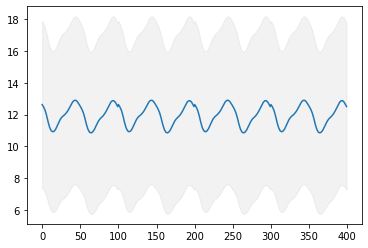

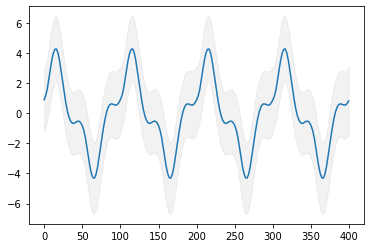

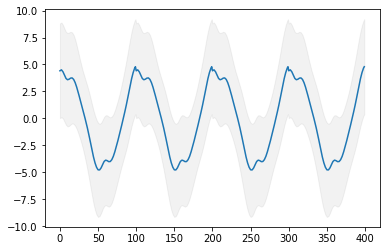

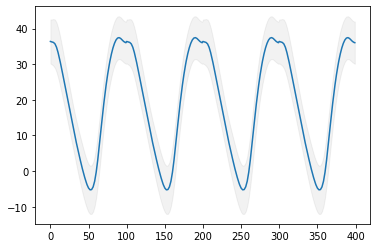

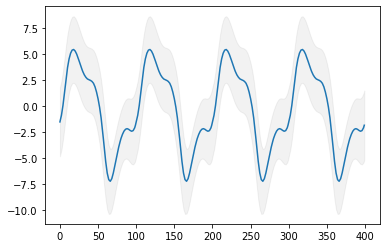

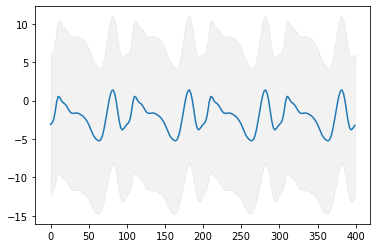

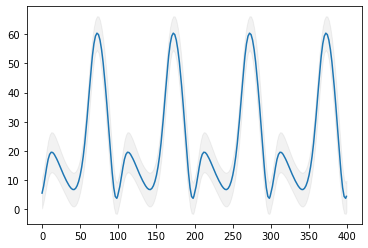

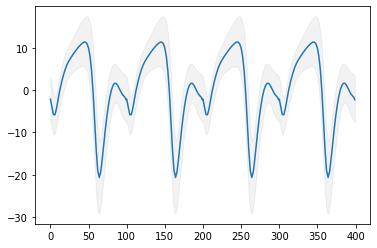

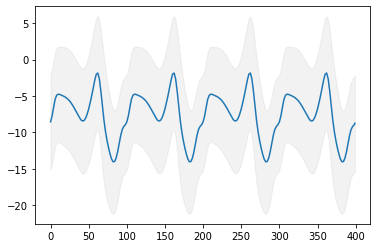

In [63]:
ikref.plot()

In [138]:
class GaitNormativeRefData(RefData):
    def __init__(self, own_action_name="gait"):
        RefData.__init__(self,own_action_name)
    def set_from_sheet(self, sheet_name=None):
        if not sheet_name:
            raise(ValueError("need sheet_name"))
        ik_names = {}
        index_name="'Gait_percentage'"
        
        df = pd.read_excel(io="normative-dataset-comparison.xlsx",sheet_name=sheet_name,  header=[0,1], 
                   index_col=[0,1], )
        
        unique_movement_names = list(set(df.index.get_level_values(0)))
        latex_friendly_names = [latex_friendly_column_names(name) for name in unique_movement_names]
        
        
        for movement_name, friendly_movement_name in zip(unique_movement_names,latex_friendly_names):
            
            self.reference_curve_dict.update({friendly_movement_name:[RefDataPrimitive(),RefDataPrimitive()]})
            
            for col in df.columns:
                ik_index = None
                if col[0] == 'Your data':
                    continue
                if 'one' in col[0]:
                    ik_index = 0
                if 'two' in col[0]:
                    ik_index = 1
                #print(col, movement_name, ik_index)

                self.reference_curve_dict[friendly_movement_name][ik_index].name = col[0]    


                if col[1] == 'Average':
                    self.reference_curve_dict[friendly_movement_name][ik_index].mean = df[col][movement_name].values
                    self.reference_curve_dict[friendly_movement_name][ik_index].x = 100*np.array(df[col][movement_name].index)
                    #print(self.reference_curve_dict[friendly_movement_name][ik_index].x)
                if col[1] == 'SD':
                    self.reference_curve_dict[friendly_movement_name][ik_index].sd = df[col][movement_name].values
                

class GaitIKRefData(GaitNormativeRefData):
    def __init__(self, action=""):
        GaitNormativeRefData.__init__(self, action)
        self.set_from_sheet(sheet_name=u"Joint Rotations")
    #def plot_reference_name(self, reference_name, scale=[], num_cycles = 0, avg_line=False, ax=None):
    #    pass


In [140]:
ikref = GaitIKRefData()

In [141]:
ikref.reference_curve_dict['Knee_Flx_Ext'][0].mean.size

51

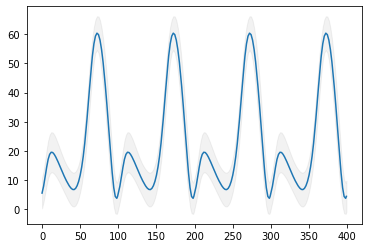

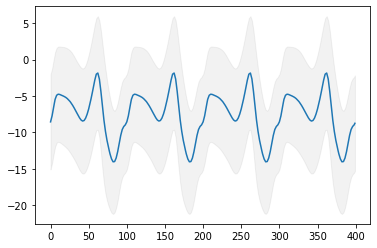

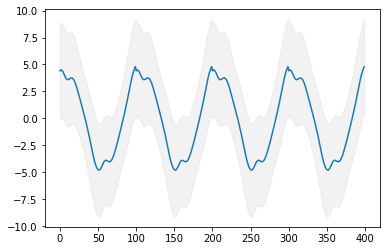

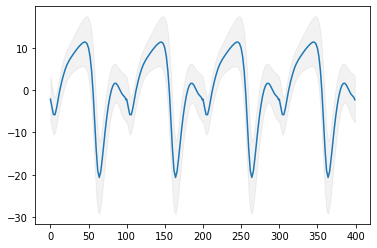

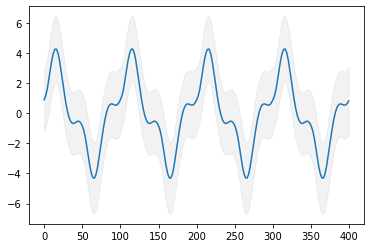

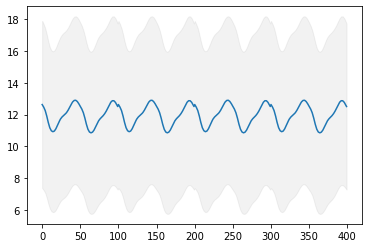

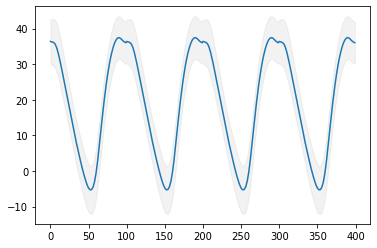

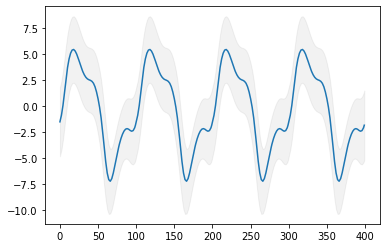

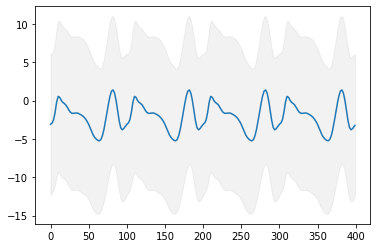

In [142]:
ikref.plot()

In [144]:
            
class IdData(RefData):
    def __init__(self, action=""):
        RefData.__init__(self, action)
    #def plot_reference_name(self, reference_name, scale=[], num_cycles = 0, avg_line=False, ax=None):
    #    pass

class GaitIDData(GaitNormativeRefData):
        def __init__(self, action=""):
            GaitNormativeRefData.__init__(self, action)
            self.set_from_sheet(sheet_name=u"Joint Moments")

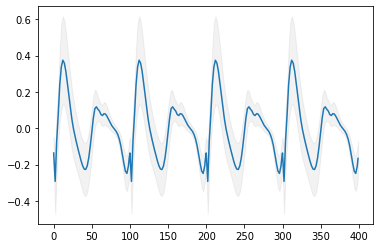

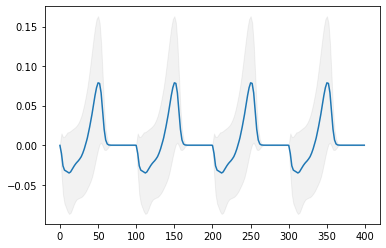

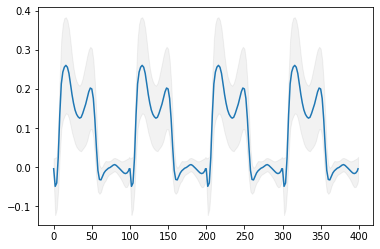

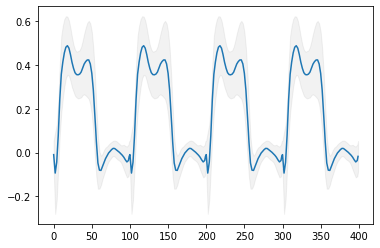

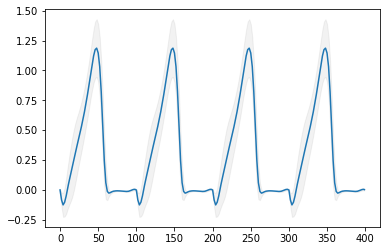

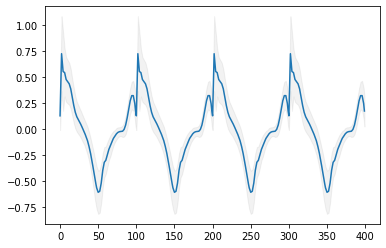

In [145]:
idref =GaitIDData()
idref.plot()

In [20]:
b = pd.read_excel(io="normative-dataset-comparison.xlsx",sheet_name=u"Joint Moments",  header=[0,1], 
                   index_col=[0,1], )

In [21]:
b

% Gait Cycle                  Centre one               Centre two            \
                                 Average            SD    Average        SD   
Hip Extensor Moment   0.00  1.268070e-01  1.365158e-01   0.315694  0.152085   
                      0.02  7.238127e-01  3.599663e-01   0.646613  0.187913   
                      0.04  5.528368e-01  3.786484e-01   0.602903  0.172241   
                      0.06  5.423323e-01  2.295319e-01   0.388500  0.180041   
                      0.08  4.759231e-01  2.151599e-01   0.227898  0.193521   
...                                  ...           ...        ...       ...   
Ankle Rotation Moment 0.92  1.342712e-11  1.359133e-10   0.000000  0.000000   
                      0.94 -6.162637e-10  5.545091e-09   0.000000  0.000000   
                      0.96 -2.083833e-08  1.874204e-07   0.000000  0.000000   
                      0.98 -3.071798e-07  2.774149e-06   0.000074  0.000584   
                      1.00 -2.509441e-05  2.262867e-04   0.000156  0.001232   

% Gait Cycle                   Your data                
                                 Average            SD  
Hip Extensor Moment   0.00  2.212503e-01  1.443003e-01  
                      0.02  6.852128e-01  2.739396e-01  
                      0.04  5.778700e-01  2.754445e-01  
                      0.06  4.654162e-01  2.047864e-01  
                      0.08  3.519107e-01  2.043407e-01  
...                                  ...           ...  
Ankle Rotation Moment 0.92  6.713559e-12  6.795664e-11  
                      0.94 -3.081319e-10  2.772545e-09  
                      0.96 -1.041916e-08  9.371021e-08  
                      0.98  3.694318e-05  2.934874e-04  
                      1.00  6.567860e-05  7.290940e-04  

[306 rows x 6 columns]